In [287]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd


def autolabel(graph):
    for g in graph:
        height = g.get_height()
        plt.text(g.get_x() + g.get_width()/2., height,'%d' % int(height),ha='center', va='bottom')

In [232]:
df_data = pd.read_csv("shootings.csv", index_col="id").reset_index(drop=True)
df_data

,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4890,Rayshard Brooks,2020-06-12,shot,Taser,27.0,M,Black,Atlanta,GA,False,attack,Foot,True,Electrical devices
4891,Caine Van Pelt,2020-06-12,shot,gun,23.0,M,Black,Crown Point,IN,False,attack,Car,False,Guns
4892,Hannah Fizer,2020-06-13,shot,unarmed,25.0,F,White,Sedalia,MO,False,other,Not fleeing,False,Unarmed
4893,William Slyter,2020-06-13,shot,gun,22.0,M,White,Kansas City,MO,False,other,Other,False,Guns


### Player statistics by state

<IPython.core.display.Javascript object>


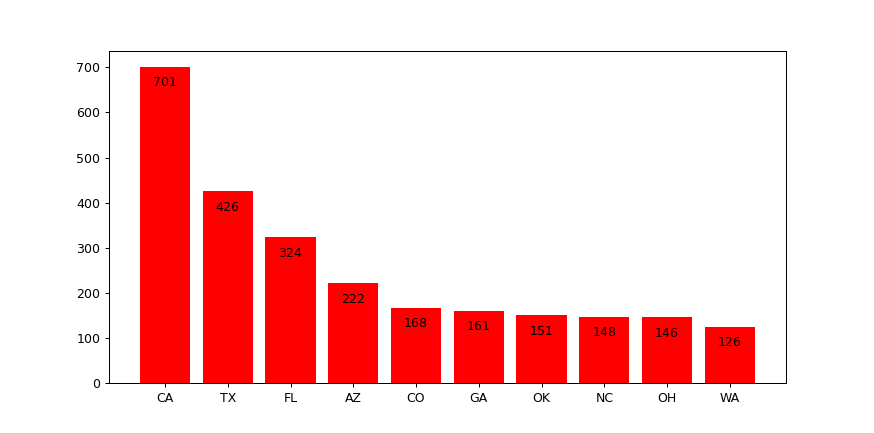

In [236]:
plt.figure()
graph1 = df_data["state"].value_counts().iloc[:10]
graph1 = graph1.to_frame().reset_index()
graph1.columns = ["state", "players"]
graph1 = plt.bar(x=graph1['state'], height=graph1['players'],color='r')
autolabel(graph1)

### Number of female players by state

<IPython.core.display.Javascript object>


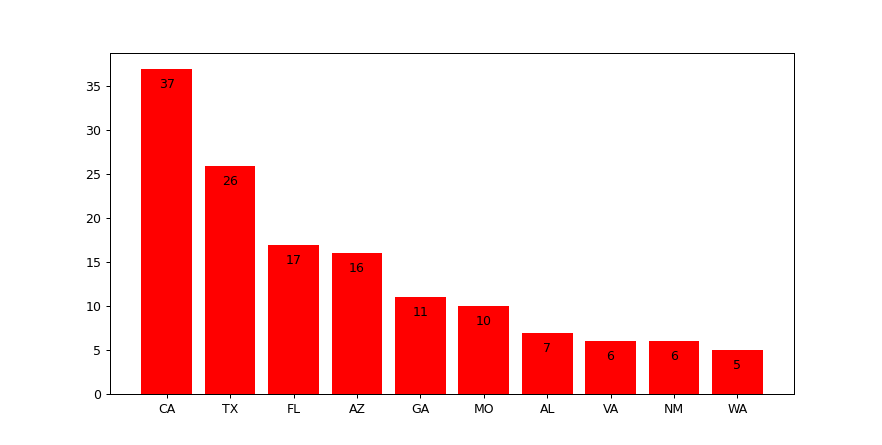

In [251]:
plt.figure()
graph2 = df_data.loc[df_data['gender'] == 'F']
graph2 = graph2["state"].value_counts().iloc[:10]
graph2 = graph2.to_frame().reset_index()
graph2.columns = ["state", "players"]
graph2 = plt.bar(x=graph2['state'], height=graph2['players'],color='r')
autolabel(graph2)

### Percentage of female players on state

<IPython.core.display.Javascript object>


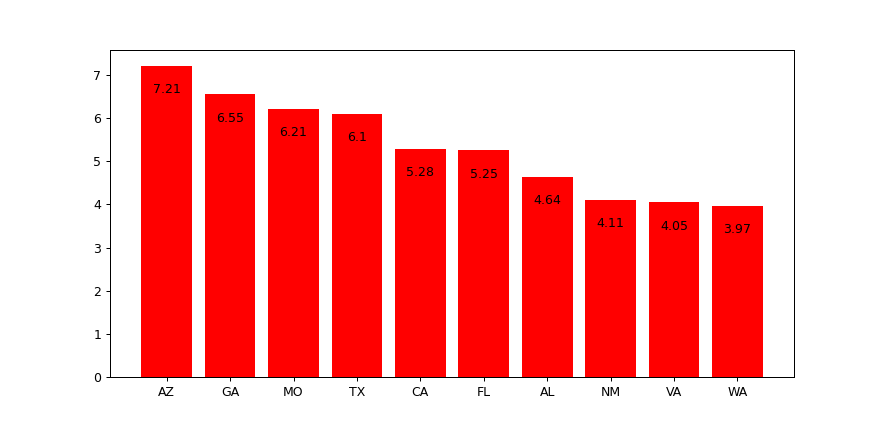

In [288]:
temparray, temparray2 = [], []
for gr in graph2:
    temparray.append(gr.get_height())
    
test = df_data["state"].value_counts().iloc[:10]
test = test.to_frame().reset_index()
test.columns = ["state", "players"]

it = 0
for t in test['players']:
    temparray2.append(round((temparray[it]/t)*100,2))
    it = it + 1

plt.figure()
graph3 = df_data.loc[df_data['gender'] == 'F']
graph3 = graph3["state"].value_counts().iloc[:10]

graph3 = graph3.to_frame().reset_index()
graph3.columns = ["state", "players"]
graph3['players'] = temparray2
graph3 = graph3.sort_values(by='players',ascending=False)
graph3 = plt.bar(x=graph3['state'], height=graph3['players'],color='r')
autolabel(graph3)
